# Робота з даними

1. Якою мовою написано найбільше книг?
2. Яка книга має набільший рейтинг?
3. Який автор має найбільший рейтинг?
4. В якому році видано найбільше книг?
5. Яке видавницто видало найбільше книг?
6. Чи є вплив к-сть сторінок на рейтинг книги?
7. Візуалізація розподілення рейтингу.

Імпорт необхідних бібіліотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Читання файлу

In [2]:
df = pd.read_csv('books.csv')

## Обробка та аналіз даних

Ознайомлення з данимим (вивід перших 3 рядків). 

In [3]:
df.head(3)

,Id,Name,ISBN,Authors,Language,pagesNumber,PublishYear,PublishMonth,PublishDay,Publisher,CountsOfReview,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal,Rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,NaN,J.K. Rowling,eng,652,2006,16,9,Scholastic Inc.,28062,1:9896,2:25317,3:159960,4:556485,5:1546466,total:2298124,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,0439358078,J.K. Rowling,eng,870,2004,1,9,Scholastic Inc.,29770,1:12455,2:37005,3:211781,4:604283,5:1493113,total:2358637,4.50
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,NaN,J.K. Rowling,eng,309,2003,1,11,Scholastic Inc,75911,1:108202,2:130310,3:567458,4:1513191,5:4268227,total:6587388,4.47


Змінемо тип даних в стовпцях RatingDist1, RatingDist2 і т.д.

In [4]:
columns = ['RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5', 'RatingDistTotal']
df[columns] = df[columns].applymap(lambda x: int(x.split(':')[-1]))

Перевіряємо чи є дублікати

Скільки унікальних книг (назв) маємо? (результатом є число меньше за загальну к-сть)

In [5]:
df['Name'].nunique()

569542

Які дублікати у колонці назва?

In [6]:
df[df['Name'].duplicated(keep = False)].sort_values('Name')

,Id,Name,ISBN,Authors,Language,pagesNumber,PublishYear,PublishMonth,PublishDay,Publisher,CountsOfReview,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal,Rating
466382,18834,"""Believing Women"" in Islam: Unreading Patriarc...",8121511518,Asma Barlas,eng,254,2005,1,5,SAMA,1,37,43,145,272,644,1141,4.26
299739,16479,"""Believing Women"" in Islam: Unreading Patriarc...",0292709048,Asma Barlas,eng,272,2002,15,6,University of Texas Press,35,35,43,146,272,641,1137,4.27
597615,19629,"""Fire! Fire!"" Said Mrs. McGuire",0152275622,Bill Martin Jr.,NaN,32,1996,1,3,HMH Books for Young Readers,0,14,30,56,27,26,153,3.14
219423,47904,"""Fire! Fire!"" Said Mrs. McGuire",0152057250,Bill Martin Jr.,NaN,32,2006,1,5,HMH Books for Young Readers,5,14,30,56,27,26,153,3.14
351302,13183,"""I'm, Like, SO Fat!"": Helping Your Teen Make H...",1572309806,Dianne Neumark-Sztainer,NaN,316,2005,8,6,The Guilford Press,2,0,1,3,4,10,18,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247574,19469,天龍八部（一）,9573255731,Jin Yong (金庸),zho,474,2005,16,9,遠流出版事業股份有限公司,2,2,3,7,20,63,95,4.46
112620,54329,天龍八部（三）,9573229358,Jin Yong (金庸),zho,448,1996,16,12,遠流出版事業股份有限公司,0,0,1,1,10,35,47,4.68
357362,19243,天龍八部（三）,9573255758,Jin Yong (金庸),zho,464,2005,16,9,遠流出版事業股份有限公司,0,0,1,1,10,35,47,4.68
247576,19471,天龍八部（四）,9573255766,Jin Yong (金庸),zho,426,2005,16,9,遠流出版事業股份有限公司,0,1,2,1,16,53,73,4.62


Дублікати по назві - книги видані в різні роки різними видавництвами.

Чи є дублікати по всім стовпцям? (ні)

In [7]:
df[df.duplicated(keep = False)]

,Id,Name,ISBN,Authors,Language,pagesNumber,PublishYear,PublishMonth,PublishDay,Publisher,CountsOfReview,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal,Rating


Пошук пропущених значень

In [5]:
df_na = df[df.isna().any(axis=1)]
print(f"Пропущених значень: {df_na.shape}")
print(f"Всього даних: {df.shape}")

Пропущених значень: (496552, 18)
Всього даних: (619879, 18)


Бачимо, що це дуже багато значень.

Яких даних найбільше пропущено? (зробимо візуалізацію для більшої наглядності)

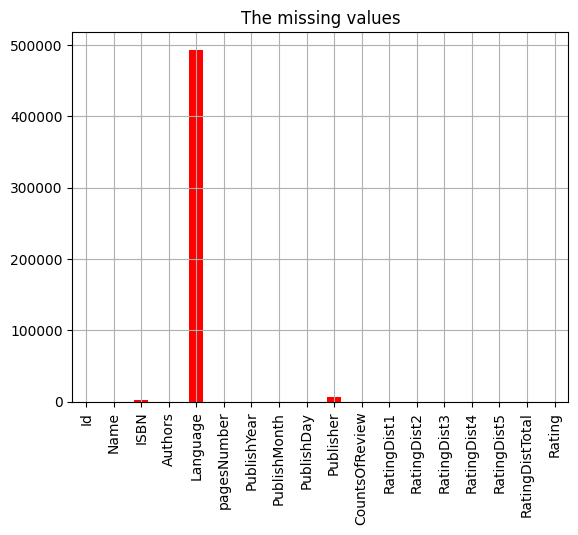

In [6]:
df.isna().sum().plot(kind='bar', color='red')
plt.title('The missing values')
plt.grid()
plt.show()

Описові статистики для PublishYear, PublishMonth та PublishDay.

In [10]:
df[['PublishYear', 'PublishMonth', 'PublishDay']].describe()

,PublishYear,PublishMonth,PublishDay
count,619879.000000,619879.000000,619879.000000
mean,1998.894339,9.809442,6.315576
std,34.041822,10.350946,3.606491
min,162.000000,1.000000,1.000000
25%,1995.000000,1.000000,3.000000
50%,2001.000000,4.000000,6.000000
75%,2005.000000,18.000000,9.000000
max,20040.000000,31.000000,12.000000


Бачимо переплутані день та місяць, змінюємо їх і ще обмежуємо роки.

In [7]:
df['PublishMonth'], df['PublishDay'] = df['PublishDay'], df['PublishMonth']
df.drop((df[(df['PublishYear'] < 1800) | (df['PublishYear'] > 2023)].index).tolist(), inplace = True)

Як записані мови?

In [8]:
df['Language'].unique()

array(['eng', 'en-US', nan, 'fre', 'spa', 'mul', 'en-GB', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'kor', 'tur',
       'gla', 'lit', 'per', 'pol', 'gle', 'cat', 'afr', 'ind', 'frs',
       'sco', 'nav', 'myn', 'gre', 'urd', 'elx', '--', 'cze', 'tlh',
       'ang', 'hin', 'raj', 'nub', 'fin', 'dan', 'heb', 'ypk', 'lao',
       'hye', 'fil', 'frm', 'tgl', 'wak', 'tam', 'scr', 'hun', 'guj',
       'chp', 'tha', 'eus', 'rum', 'fan', 'est', 'epo', 'nqo'],
      dtype=object)

Зробимо всі у одному форматі (з 'en-US', 'en-GB', 'en-CA' в 'eng', а 'nl' - 'nld').

In [9]:
df['Language'] = df['Language'].str.replace('en-US', 'eng').str.replace('en-GB', 'eng').str.replace('en-CA', 'eng').str.replace('nl', 'nld')

Описові статиски для рейтингу.

In [10]:
df['Rating'].describe()

count    619865.000000
mean          3.443591
std           1.285951
min           0.000000
25%           3.460000
50%           3.840000
75%           4.100000
max           5.000000
Name: Rating, dtype: float64

Яка к-сть книг припадає на кожний діапазон рейтингу? (візуалізація)

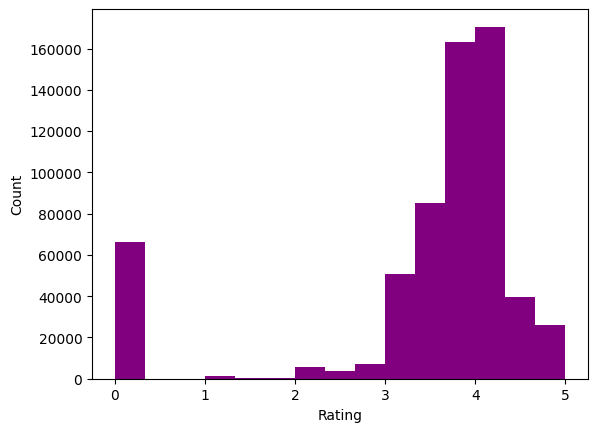

In [11]:
plt.hist(df['Rating'], bins=15, color='purple')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Описові статистики для к-сті сторінок.

In [12]:
df['pagesNumber'].describe()

count    6.198650e+05
mean     2.789696e+02
std      2.892091e+03
min      0.000000e+00
25%      1.540000e+02
50%      2.430000e+02
75%      3.440000e+02
max      2.254246e+06
Name: pagesNumber, dtype: float64

## Дослідження даних


1. Якою мовою написано найбільше книг?

In [13]:
df['Language'].value_counts().index[0]

'eng'

Подивимось топ 5 мов.

In [14]:
df['Language'].value_counts().head(5)

Language
eng    115502
fre      3991
spa      2962
ger      2384
ita       249
Name: count, dtype: int64

2. Яка книга має найбільший рейтинг?

In [15]:
df['Name'][df['Rating'] == df['Rating'].max()]

230                         A Colorful Symphony: Full Score
238                           Bullets, Badges, and Bullshit
276       New York Trilogy: New York Underground, Trappe...
320       21st Century Mysteries: Nikola Tesla: Federal ...
501                                   The Guitar Chord Deck
                                ...                        
619671    A Rapid Assessment of the Humid Forests of Sou...
619746    Democritus: Science, The Arts, And The Care Of...
619747                                 The Brancacci Chapel
619798    Off Your Rocker!: Ultimate Guide for Grandparents
619874    Family: Everyday Stories About the Miracle of ...
Name: Name, Length: 18235, dtype: object

Бачимо, що даних забагато. Тому зробимо більш релевантно, та додамо умову, що оцінок більше 1000.

In [155]:
df['Name'][(df['Rating'] == df['Rating'].max()) & (df['RatingDistTotal'] > 1000)]

Series([], Name: Name, dtype: object)

Таких книг немає, тому подивимось, яка книга має найбільшу кількість оцінок 5.

In [156]:
df['Name'][df['RatingDist5'] == df['RatingDist5'].max()]

594197    Harry Potter à l'école des sorciers (Harry Pot...
Name: Name, dtype: object

Цікаво, скільки всього книг про Гаррі Потера в нашому датасеті. Знайдемо всі книги про Гаррі Потера.

In [213]:
df['Name'][df['Name'].str.contains('Harry Potter')].drop_duplicates()

0         Harry Potter and the Half-Blood Prince (Harry ...
1         Harry Potter and the Order of the Phoenix (Har...
2         Harry Potter and the Sorcerer's Stone (Harry P...
3         Harry Potter and the Chamber of Secrets (Harry...
4         Harry Potter and the Prisoner of Azkaban (Harr...
                                ...                        
588044    Harry Potter et L'Ordre du Phenix (Harry Potte...
588826      Harry Potter i Zakon Feniksa (Harry Potter, #5)
589281        Harry Potter i Czara Ognia (Harry Potter, #4)
594197    Harry Potter à l'école des sorciers (Harry Pot...
599041    Beatrix Potter To Harry Potter: Portraits Of C...
Name: Name, Length: 166, dtype: object

Книг багато, так як вони різними мовами.

3. Який автор має найбільший рейтинг?

In [16]:
df['Authors'][df['RatingDist5'] == df['RatingDist5'].max()]

594197    J.K. Rowling
Name: Authors, dtype: object

Цікаво, яку кількість оцінок вона має по кожному балу, тому візуалізуємо.

In [17]:
rowling_list = []
author = 'J.K. Rowling'

for i in range(1, 6):
    rating_dist = f'RatingDist{i}'
    rowling_list.append(df.loc[df['Authors'] == author, rating_dist].sum())

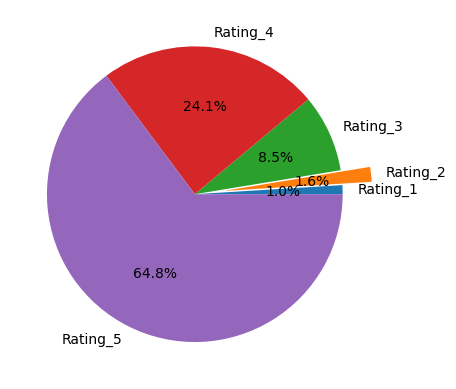

In [25]:
labels = ["Rating_1", "Rating_2", "Rating_3", "Rating_4", "Rating_5"]
explode = (0, 0.2, 0, 0, 0)

plt.pie(rowling_list, explode=explode, labels = labels, autopct='%1.1f%%')
plt.show()

4. В якому році видано найбільше книг?

In [22]:
df['PublishYear'].value_counts().idxmax()

2006

Подивимось яка тенденція к-сть книг за роки.

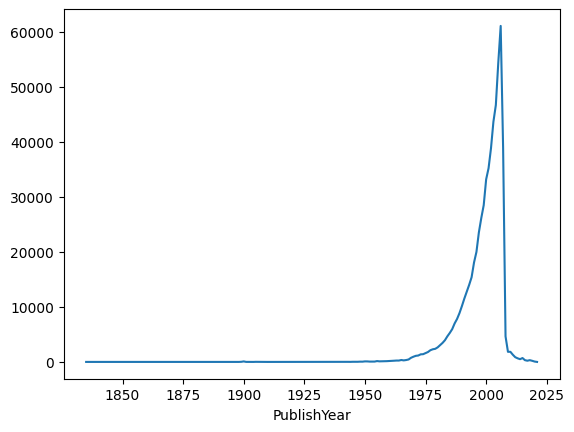

In [26]:
df.groupby('PublishYear')['Id'].count().plot()
plt.show()

Детальніше розглянемо діапазон з 1985 по 2010.

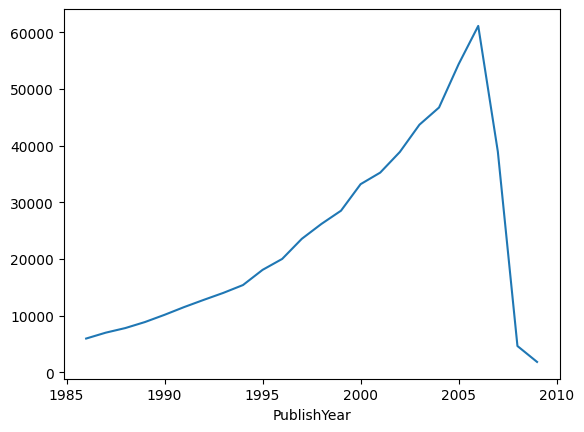

In [215]:
df[(1985 < df['PublishYear']) & (df['PublishYear'] < 2010)].groupby('PublishYear')['Id'].count().plot()
plt.show()

Бачимо нашу початкову відповідь вілуально.

5. Яке видавницто видало найбільше книг?

In [163]:
df['Publisher'].value_counts().idxmax()

'Routledge'

Візуально подивимось топ 7 видавництв за кількістю виданих книг.

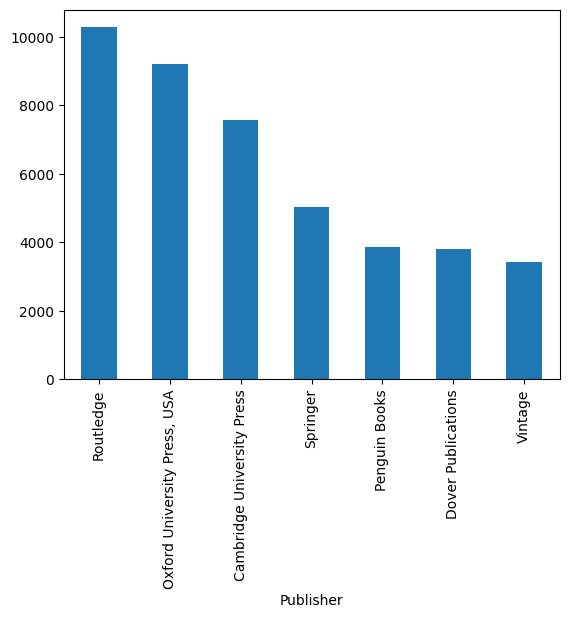

In [164]:
df.groupby('Publisher')['Name'].count().sort_values(ascending = False).head(7).plot(kind='bar')
plt.show()

Бачимо, що перші 3 мають не дуже велику різницю між собою. Подивимось їх тенденцію з роками.

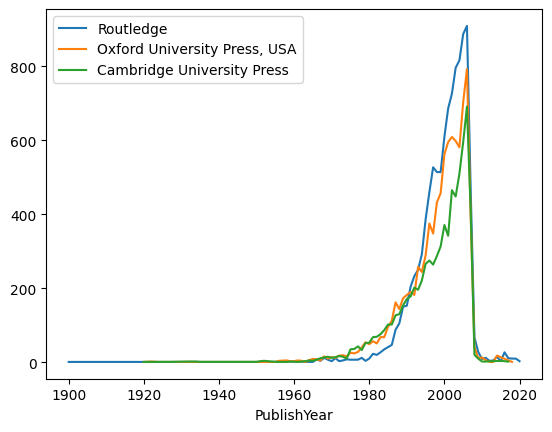

In [170]:
df_publisher = df['Publisher'].value_counts().head(3)

for publisher in df_publisher.index:
    df[df['Publisher'] == publisher].groupby('PublishYear')['Id'].count().plot()

plt.legend(labels=df_publisher.index)
plt.show()

6. Чи впливає к-сть сторінок на рейтинг книг?

In [199]:
df[['RatingDistTotal', 'RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5', 'CountsOfReview', 'pagesNumber']].corr()

,RatingDistTotal,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,CountsOfReview,pagesNumber
RatingDistTotal,1.000000,0.791946,0.840996,0.922982,0.985970,0.967541,0.194007,0.001346
RatingDist1,0.791946,1.000000,0.944191,0.869208,0.794664,0.672274,0.215886,0.000985
RatingDist2,0.840996,0.944191,1.000000,0.966690,0.877768,0.689252,0.207776,0.000943
RatingDist3,0.922982,0.869208,0.966690,1.000000,0.960063,0.797208,0.200732,0.001027
RatingDist4,0.985970,0.794664,0.877768,0.960063,1.000000,0.918834,0.196873,0.001311
RatingDist5,0.967541,0.672274,0.689252,0.797208,0.918834,1.000000,0.170804,0.001397
CountsOfReview,0.194007,0.215886,0.207776,0.200732,0.196873,0.170804,1.000000,0.001323
pagesNumber,0.001346,0.000985,0.000943,0.001027,0.001311,0.001397,0.001323,1.000000


Бачимо, що ні, не впливає.

7. Розподілення рейтингу (візуалізація - ящик з "вусами").

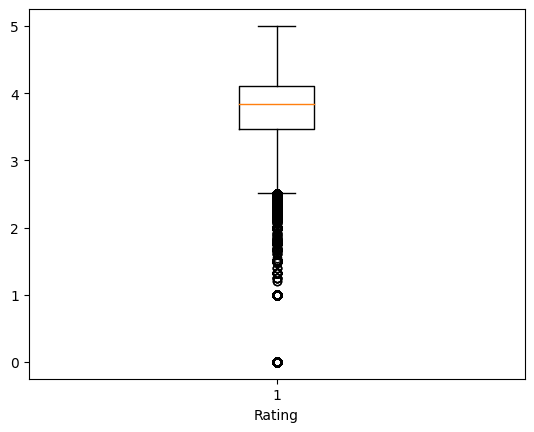

In [178]:
plt.boxplot(df['Rating'])
plt.xlabel('Rating')
plt.show()

Бачимо багато викидів. Подивимось, скільки книг маю рейтинг нижче за оцінку 2.5.

In [27]:
df['Id'][df['Rating'] < 2.5].count()

74033

Тому на графіку і бачимо таку к-сть викидів. Порахуємо який це відсоток.

In [28]:
per = (df['Id'][df['Rating'] < 2.5].count() / df['Id'].count())*100
print(f"{per:.2f}%")

11.94%


Дось викосий відсоток.